In [23]:
import os
import json
import csv
from collections import defaultdict, Counter

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

RESULTS_FOLDER = 'reinforce_runs'

In [32]:
f_name = RESULTS_FOLDER + '/exp_1/' + 'rewards.csv'

In [44]:
def folder_results(folder_path: str):
    with open(os.path.join(folder_path, 'config.json')) as conf_file:
        conf = json.load(conf_file)

    rewards = np.genfromtxt(os.path.join(folder_path, 'rewards.csv'), delimiter=',', skip_header=1)
    val_score = np.genfromtxt(os.path.join(folder_path, 'validation_rewards.csv'), delimiter=',')
    return conf, rewards, val_score

In [333]:
def conf2tuple(conf: dict, include_depth=False):
    if include_depth:
        return (conf['sigma'], conf['gamma'], conf['update_frequency'], conf['depth'])
        
    return (conf['sigma'], conf['gamma'], conf['update_frequency']) #, conf['depth'])

In [330]:
def get(folder_name = RESULTS_FOLDER, include_depth=False):
    conf2rewards_history = defaultdict(list)
    
    if type(folder_name) == str: 
        for folder in os.listdir(folder_name):
            # for file in os.listdir(os.path.join(RESULTS_FOLDER, folder)):
            conf, rewards, val_scores = folder_results(os.path.join(folder_name, folder))
            conf2rewards_history[conf2tuple(conf, include_depth)].append(rewards)
            

        # print(solved_cnt)
        return conf2rewards_history
    ##########################################################
    for fname in folder_name:
        for folder in os.listdir(fname):
                # for file in os.listdir(os.path.join(RESULTS_FOLDER, folder)):
                conf, rewards, solved = folder_results(os.path.join(fname, folder))

                if solved or not only_solved:
                    solved_cnt += 1
                    conf2rewards_history[conf2tuple(conf, include_depth)].append(rewards)
                    # smoothed_rewards = savgol_filter(rewards, 100, 1)

                    # print(conf['training_config'])
                    # if solved:
            # plt.show()
            # print(solved_cnt)
    
    return conf2rewards_history

In [339]:
def get_validation(folder_name = RESULTS_FOLDER, include_depth=True):
    conf2rewards_history = defaultdict(list)
    
    if type(folder_name) == str: 
        for folder in os.listdir(folder_name):
            # for file in os.listdir(os.path.join(RESULTS_FOLDER, folder)):
            conf, rewards, val_scores = folder_results(os.path.join(folder_name, folder))
            conf2rewards_history[conf2tuple(conf, include_depth)].append(val_scores)
            

        # print(solved_cnt)
        return conf2rewards_history
    ##########################################################
    for fname in folder_name:
        for folder in os.listdir(fname):
                # for file in os.listdir(os.path.join(RESULTS_FOLDER, folder)):
                conf, rewards, solved = folder_results(os.path.join(fname, folder))

                if solved or not only_solved:
                    solved_cnt += 1
                    conf2rewards_history[conf2tuple(conf, include_depth)].append(rewards)
                    # smoothed_rewards = savgol_filter(rewards, 100, 1)

                    # print(conf['training_config'])
                    # if solved:
            # plt.show()
            # print(solved_cnt)
    
    return conf2rewards_history

In [ ]:
def get_statsss(runs):
    smoothed = [np.concatenate([savgol_filter(run, 100, 1), run[-5:]]) for run in runs]
    
    max_len = max([len(i) for i in smoothed])
    means = []
    stds = []

    for i in range(max_len):
        means.append(np.mean([run[i] for run in smoothed if len(run) > i]))
        stds.append(np.std([run[i] for run in smoothed if len(run) > i]))
    

    means = np.array(means)
    stds = np.array(stds)
    print(means.mean(), stds.mean())
    return means, stds

In [ ]:
def plot_conf(runs, title='', figsize=(7,7), save_file_name=None):
    smoothed = [np.concatenate([savgol_filter(run, 100, 1), run[-5:]]) for run in runs]
    
    max_len = max([len(i) for i in smoothed])
    means = []
    stds = []

    for i in range(max_len):
        means.append(np.mean([run[i] for run in smoothed if len(run) > i]))
        stds.append(np.std([run[i] for run in smoothed if len(run) > i]))
    

    means = np.array(means)
    stds = np.array(stds)
    
    plt.figure(figsize=figsize)
    plt.plot(range(len(means)), means)
    plt.fill_between(range(len(means)),means, means+stds, color='blue', alpha=0.2)
    plt.fill_between(range(len(means)),means, means-stds,  color='blue', alpha=0.2)
    plt.xlabel('Episode', fontsize=18)
    plt.ylabel('Reward', fontsize=18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title, fontsize=20)
    
    if save_file_name is not None:
        plt.savefig(save_file_name)

In [320]:
def plot_confs(all_runs, title='', figsize=(7,7), smoother=100, save_file_name=None):
    l = int(len(all_runs)**0.5)
    max_x_len = round(max([len(run) for run_set in all_runs.values() for run in run_set]) / 1e3, 1) * 1e3
    fig, axs = plt.subplots(l, l, figsize=figsize, sharex=True, sharey=True)
    
    for subplot_index, (runs_key, runs_val) in enumerate(all_runs.items(), start=0):
        smoothed = [np.concatenate([savgol_filter(run, smoother, 1), run[-5:]]) for run in runs_val]

        max_len = max([len(i) for i in smoothed])
        means = []
        stds = []

        for i in range(max_len):
            means.append(np.mean([run[i] for run in smoothed if len(run) > i]))
            stds.append(np.std([run[i] for run in smoothed if len(run) > i]))


        means = np.array(means)
        stds = np.array(stds)

        # plt.figure(figsize=figsize)
        axs[subplot_index // l, subplot_index % l].plot(range(len(means)), means, color='#9259b3')
        axs[subplot_index // l, subplot_index % l].fill_between(range(len(means)),means, means+stds, color='blue', alpha=0.2)
        axs[subplot_index // l, subplot_index % l].fill_between(range(len(means)),means, means-stds,  color='blue', alpha=0.2)
        
        axs[subplot_index // l, subplot_index % l].axhline(475, linestyle='--', color='red', linewidth=1)
        
        # Titling
        axs[subplot_index // l, subplot_index % l].set_title([round(k,4) for k in runs_key]) #, pad=-50)
        axs[subplot_index // l, subplot_index % l].set_xticks(np.linspace(0, max_x_len, 5), fontsize=14)
        axs[subplot_index // l, subplot_index % l].set_yticks(np.linspace(0, 500, 5), fontsize=14)
        axs[subplot_index // l, subplot_index % l].set_xlabel('Episode', fontsize=16)
        if subplot_index % l == 0:
            axs[subplot_index // l, subplot_index % l].set_ylabel('Training Reward', fontsize=16)
        
        axs[subplot_index // l, subplot_index % l].grid()
        # fig.x
        # axs[subplot_index].xlabel('Episode', fontsize=18)
        # axs[subplot_index].ylabel('Reward', fontsize=18)
        # axs[subplot_index].xticks(fontsize=20)
        # axs[subplot_index].yticks(fontsize=20)
        # axs[subplot_index].title(title, fontsize=20)
        # plt.plot()

        # if save_file_name is not None:
        #     plt.savefig(save_file_name)
    fig.subplots_adjust(hspace=0, wspace=0)
    # print(dir(fig))
    # fig.set_xlabel('Episode', fontsize=18)
    # fig.set_xlabel('Reward', fontsize=18)

## Reinforce

### Training rewards

In [94]:
conf2rewards = get()
print(len(conf2rewards))

best = {}

for k in conf2rewards:
    if len(conf2rewards[k]) >= 5:
        best[k] = conf2rewards[k]
    print(k, len(conf2rewards[k]))

(0.06708203932499368, 0.9975, 10) 5
(0.10031104574646331, 0.995, 10) 3
(0.06708203932499368, 0.9975, 15) 5
(0.06708203932499368, 1.0, 10) 10
(0.03, 0.995, 15) 4
(0.10031104574646331, 0.9924999999999999, 20) 2
(0.03, 0.9975, 10) 5
(0.06708203932499368, 0.99, 10) 1


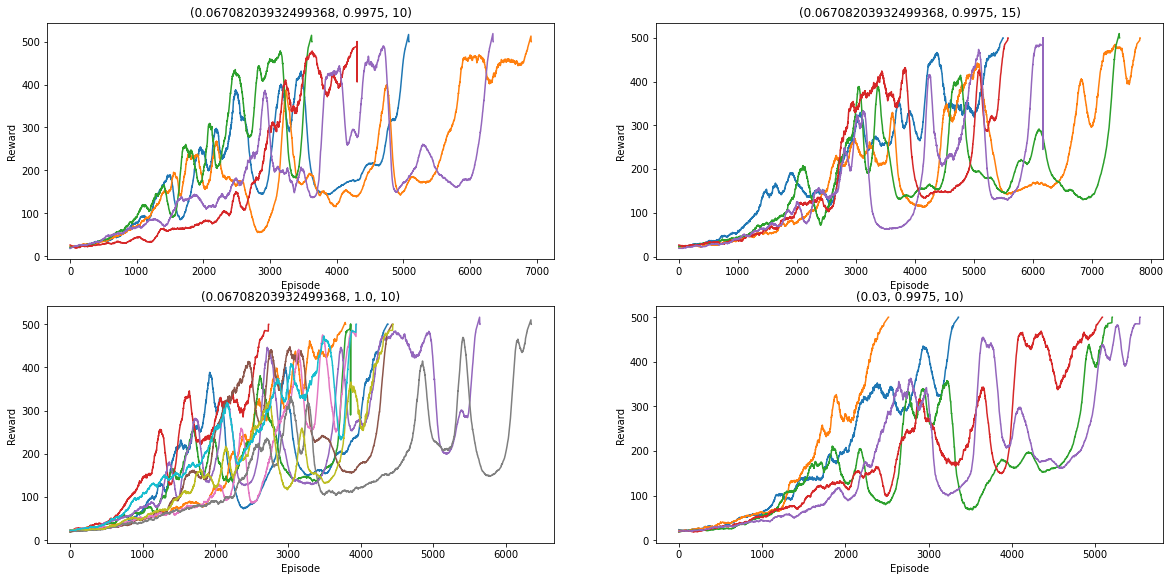

In [95]:
plt.figure(figsize=(20,20))

for index, key in enumerate(best.keys()):
    plt.subplot(4,2,index+1)
    plt.title(str(key))
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    for i in best[key]:
        plt.plot(np.concatenate([savgol_filter(i, 100, 1), i[-5:]]))

plt.show()

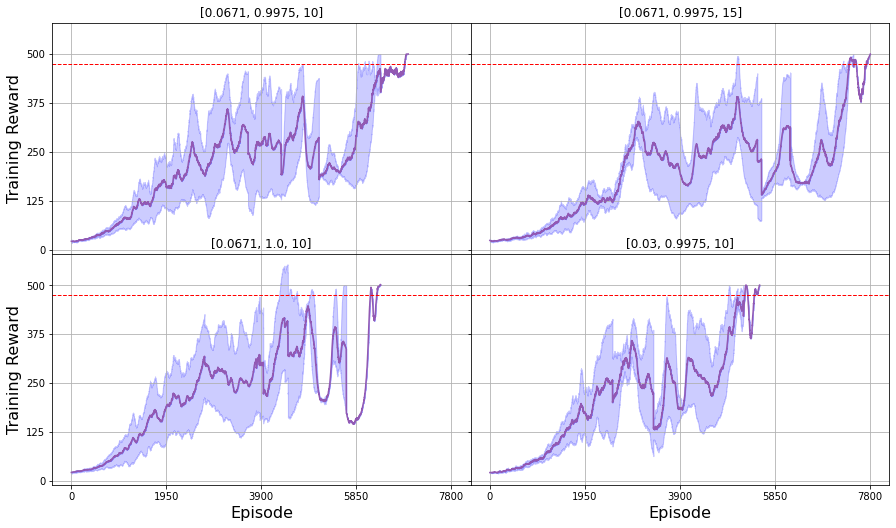

In [321]:
plot_confs(best, smoother=50, figsize=(15,8.5))

In [222]:
list(best.keys())[-1]

(0.03, 0.9975, 10)

### Validation rewards

In [227]:
conf2val = get_validation()

best_val = {}

for k in conf2val:
    if len(conf2val[k]) >= 5:
        best_val[k] = conf2val[k]
    print(k, len(conf2val[k]))

len(conf2val)

8

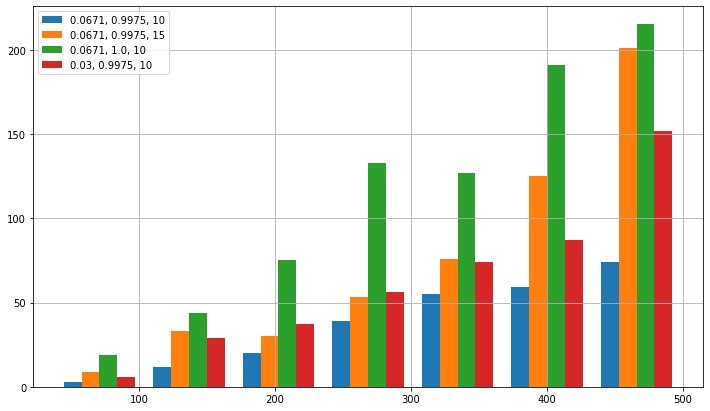

In [319]:
index = 0
ls = []
keys = []
colors = []

for bk,bv in best_val.items():
    l = [v for vals in bv for v in vals if v != 500]
    ls.append(l)
    keys.append(', '.join([str(round(i,4)) for i in bk]))
    # print(len(l), len(l) / sum([len(i) for i in list(best_val.values())[index]]))
    # plt.hist(l, bins=40, alpha=0.2);

plt.figure(figsize=(12,7))
plt.grid()
plt.set_cmap('Accent')
plt.hist(ls, bins=7, alpha=1, label=keys) #, color=plt.colormaps['Accent'].colors[:len(ls)])
plt.legend();

In [318]:
for bk,bv in best_val.items():
    a = [v for vals in bv for v in vals]
    print(bk, np.mean(a), np.std(a))

(0.06708203932499368, 0.9975, 10) 492.4434 39.47006456087956
(0.06708203932499368, 0.9975, 15) 486.584 52.73002696756375
(0.06708203932499368, 1.0, 10) 487.7345 51.57313845162033
(0.03, 0.9975, 10) 487.7104 51.43363619111525


## Actor Critic

### Training rewards

In [336]:
conf2rewards = get('actor_critic_runs', True)
print(len(conf2rewards))

best = {}

for k in conf2rewards:
    if len(conf2rewards[k]) >= 5:
        best[k] = conf2rewards[k]
    print(k, len(conf2rewards[k]))

10
(0.06708203932499368, 1.0, 20, 150) 5
(0.04486046343663661, 1.0, 20, 50) 5
(0.10031104574646331, 0.9924999999999999, 20, 150) 5
(0.06708203932499368, 1.0, 10, 100) 5
(0.06708203932499368, 1.0, 15, 50) 4
(0.04486046343663661, 0.9975, 15, 100) 5
(0.03, 0.9975, 20, 50) 5
(0.10031104574646331, 1.0, 10, 50) 5
(0.03, 0.99, 10, 50) 5
(0.04486046343663661, 0.995, 10, 100) 5


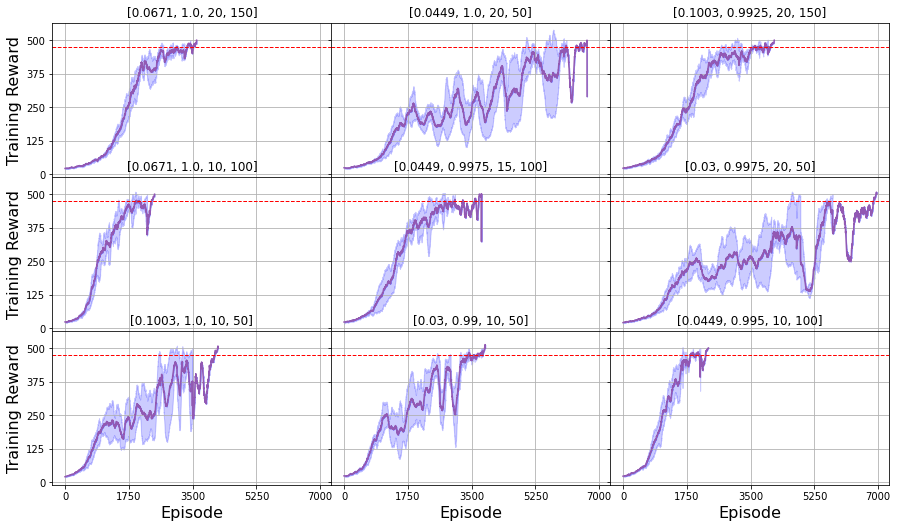

In [337]:
plot_confs(best, smoother=50, figsize=(15,8.5))

### Validation rewards

In [340]:
conf2val = get_validation('actor_critic_runs', True)

best_val = {}

for k in conf2val:
    if len(conf2val[k]) >= 5:
        best_val[k] = conf2val[k]
    print(k, len(conf2val[k]))

len(conf2val)

(0.06708203932499368, 1.0, 20, 150) 5
(0.04486046343663661, 1.0, 20, 50) 5
(0.10031104574646331, 0.9924999999999999, 20, 150) 5
(0.06708203932499368, 1.0, 10, 100) 5
(0.06708203932499368, 1.0, 15, 50) 4
(0.04486046343663661, 0.9975, 15, 100) 5
(0.03, 0.9975, 20, 50) 5
(0.10031104574646331, 1.0, 10, 50) 5
(0.03, 0.99, 10, 50) 5
(0.04486046343663661, 0.995, 10, 100) 5


10

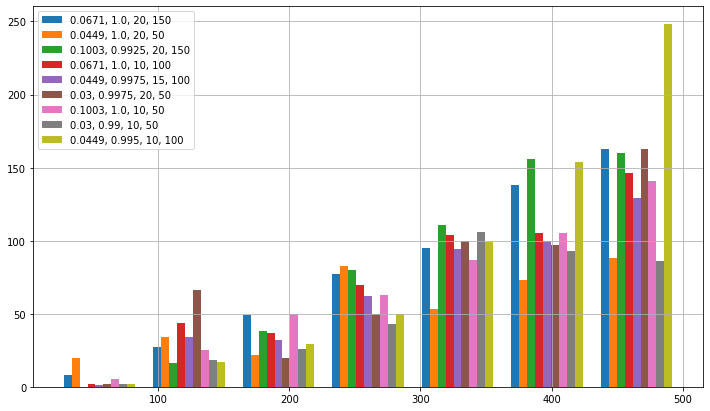

In [341]:
index = 0
ls = []
keys = []
colors = []

for bk,bv in best_val.items():
    l = [v for vals in bv for v in vals if v != 500]
    ls.append(l)
    keys.append(', '.join([str(round(i,4)) for i in bk]))
    # print(len(l), len(l) / sum([len(i) for i in list(best_val.values())[index]]))
    # plt.hist(l, bins=40, alpha=0.2);

plt.figure(figsize=(12,7))
plt.grid()
plt.set_cmap('Accent')
plt.hist(ls, bins=7, alpha=1, label=keys) #, color=plt.colormaps['Accent'].colors[:len(ls)])
plt.legend();

In [343]:
means_stds = []

for bk,bv in best_val.items():
    a = [v for vals in bv for v in vals]
    print(bk, np.mean(a), np.std(a))
    means_stds.append((np.mean(a), np.std(a)))

sorted(means_stds, key=lambda x: x[0], reverse=True)

(0.06708203932499368, 1.0, 20, 150) 483.2484 59.95323758930788
(0.04486046343663661, 1.0, 20, 50) 486.292 59.368866723224556
(0.10031104574646331, 0.9924999999999999, 20, 150) 484.8324 53.00679494404467
(0.06708203932499368, 1.0, 10, 100) 484.2546 58.84815866991932
(0.04486046343663661, 0.9975, 15, 100) 486.422 53.733005834403116
(0.03, 0.9975, 20, 50) 484.815 59.2773512819188
(0.10031104574646331, 1.0, 10, 50) 485.6536 55.688250170390525
(0.03, 0.99, 10, 50) 488.8778 47.21837425367375
(0.04486046343663661, 0.995, 10, 100) 486.402 48.977917432246954


[(488.8778, 47.21837425367375),
 (486.422, 53.733005834403116),
 (486.402, 48.977917432246954),
 (486.292, 59.368866723224556),
 (485.6536, 55.688250170390525),
 (484.8324, 53.00679494404467),
 (484.815, 59.2773512819188),
 (484.2546, 58.84815866991932),
 (483.2484, 59.95323758930788)]